In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm



In [ ]:
def visualize_gauss_distribution(mu,sigma):

    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    y = norm.pdf(x, mu, sigma)  
    data = np.random.normal(mu, sigma, 1000)

    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=30, density=True, alpha=0.6, color='b', label="Histogram (Data)")

    plt.plot(x, y, 'r', linewidth=2, label="Gaussian Curve")

    plt.title("Gaussian (Normal) Distribution")
    plt.xlabel("Value")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True)

    plt.show()


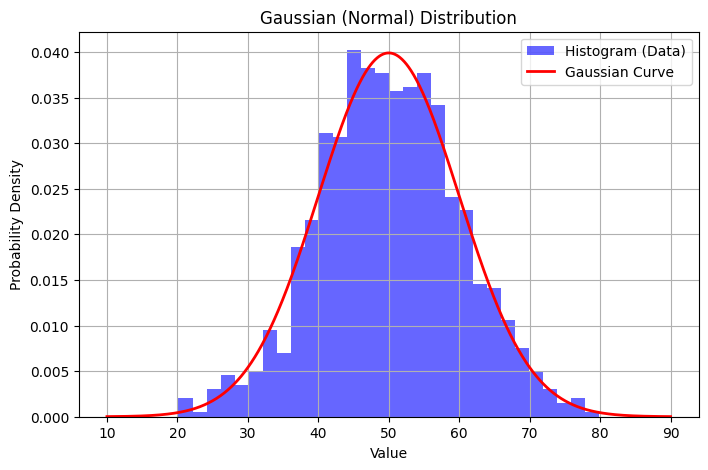

In [4]:
visualize_gauss_distribution(50,10)

In [6]:
def visualize_bernoulli_distrubition(sucess_probability,num_simulations):
    data = np.random.binomial(1, sucess_probability, num_simulations)

    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=2, edgecolor='black', alpha=0.7)
    plt.title(f'Bernoulli Distribution (p = {sucess_probability})', fontsize=14)
    plt.xlabel('Outcome', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks([0, 1], ['Failure (0)', 'Success (1)'])
    plt.show()

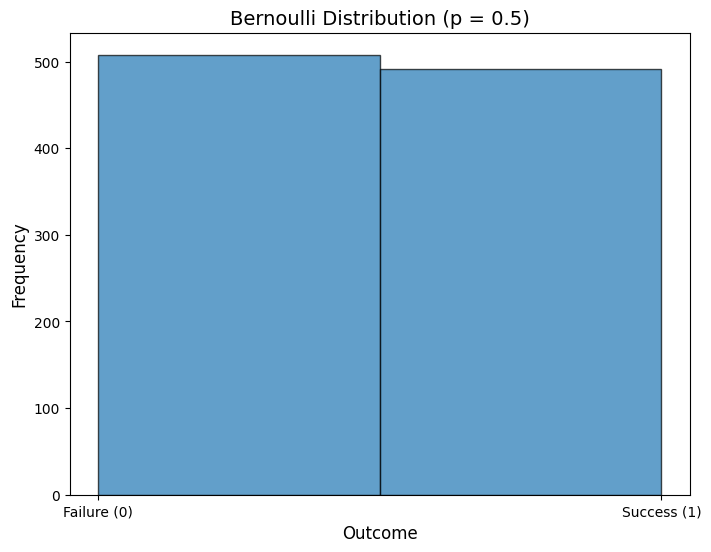

In [16]:
visualize_bernoulli_distrubition(sucess_probability=0.5,num_simulations=1000)

---

Training Transformers with various probabilities and architectures

In [1]:
text_data = [
    "I am Learning",
    "Discrete Mathematics is fun",
    "Making AI is also fun",
    "Probability Distributions",
    "The field of AI is very interesting",
    "The weather is sunny",
    "Numpy is cool",
    "Transformers have done a lot",
    "I am eating",
]

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from collections import defaultdict

In [ ]:
#Data preparation and mapping words and indexes to eachother 
word2idx = {word: idx for idx, word in enumerate(set(" ".join(text_data).split()))}
idx2word = {idx: word for word, idx in word2idx.items()}
vocab_size = len(word2idx)

def tokenize(sentence):
    """
    Converts a sentence into a list of indices corresponding to each word in the sentence.
    """
    return [word2idx[word] for word in sentence.split()]

seq_length = max(len(sentence.split()) for sentence in text_data)# Determine the maximum sentence length for padding purposes
tokenized_data = [tokenize(sentence) for sentence in text_data]# Tokenizing all sentences in the dataset

padded_data = [seq + [0] * (seq_length - len(seq)) for seq in tokenized_data]# Padding sentences with zeros to ensure uniform length

dummy_data = torch.tensor(padded_data)#Turning the padded data into a pytorch tensor(matrix)

#model hyperparameters
embed_dim = 16
num_heads = 2 
num_layers = 2
batch_size = len(text_data)
learning_rate = 0.001
epochs = 100

In [ ]:
class SimpleTransformer(nn.Module):
    """
    A simple Transformer model with optional decoder and different probability distributions.
    """
    def __init__(
        self,
        vocab_size,
        embed_dim,
        num_heads,
        num_layers,
        use_decoder=True,
        prob_dist="softmax",#default distrubtion
    ):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        encoder_layer = nn.TransformerEncoderLayer(embed_dim, num_heads)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers)
        self.use_decoder = use_decoder

        if use_decoder:
            decoder_layer = nn.TransformerDecoderLayer(embed_dim, num_heads)
            self.decoder = nn.TransformerDecoder(decoder_layer, num_layers)

        self.fc = nn.Linear(embed_dim, vocab_size)
            # Select probability distribution function
        if prob_dist == "softmax":
            self.probability_layer = nn.Softmax(dim=-1)
        elif prob_dist == "gaussian":
            self.probability_layer = lambda x: torch.exp(-(x**2))
        elif prob_dist == "bernoulli":
            self.probability_layer = lambda x: torch.bernoulli(torch.sigmoid(x))
        else:
            raise ValueError("Invalid probability distribution")

    def forward(self, x):
        x = self.embedding(x)
        x = self.encoder(x)

        if self.use_decoder:
            x = self.decoder(x, x)

        x = self.fc(x)
        return self.probability_layer(x)  # Apply probability transformation

# Define models with different configurations
models = {
    "Transformer_Softmax": SimpleTransformer(
        vocab_size, embed_dim, num_heads, num_layers, True, "softmax"
    ),
    "Transformer_Gaussian": SimpleTransformer(
        vocab_size, embed_dim, num_heads, num_layers, True, "gaussian"
    ),
    "Transformer_Bernoulli": SimpleTransformer(
        vocab_size, embed_dim, num_heads, num_layers, True, "bernoulli"
    ),
    "Encoder_Softmax": SimpleTransformer(
        vocab_size, embed_dim, num_heads, num_layers, False, "softmax"
    ),
    "Encoder_Gaussian": SimpleTransformer(
        vocab_size, embed_dim, num_heads, num_layers, False, "gaussian"
    ),
    "Encoder_Bernoulli": SimpleTransformer(
        vocab_size, embed_dim, num_heads, num_layers, False, "bernoulli"
    ),
    "Decoder_Softmax": SimpleTransformer(
        vocab_size, embed_dim, num_heads, num_layers, True, "softmax"
    ),
    "Decoder_Gaussian": SimpleTransformer(
        vocab_size, embed_dim, num_heads, num_layers, True, "gaussian"
    ),
    "Decoder_Bernoulli": SimpleTransformer(
        vocab_size, embed_dim, num_heads, num_layers, True, "bernoulli"
    ),
}

# Define loss function and optimizers
loss_fn = nn.CrossEntropyLoss()
optimizers = {
    name: optim.Adam(model.parameters(), lr=learning_rate)
    for name, model in models.items()
}

c:\Users\apili\Desktop\Projects\random_gits\discrete_structures_report_code\.venv\Lib\site-packages\torch\nn\modules\transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch | Model | Loss
-------------
    0 | Transformer_Softmax  | 2.6975
    0 | Transformer_Gaussian | 2.5677
    0 | Transformer_Bernoulli | 3.3079
    0 | Encoder_Softmax      | 2.7046
    0 | Encoder_Gaussian     | 2.5702
    0 | Encoder_Bernoulli    | 3.2156
    0 | Decoder_Softmax      | 2.6882
    0 | Decoder_Gaussian     | 2.6249
    0 | Decoder_Bernoulli    | 3.4924
-------------
   10 | Transformer_Softmax  | 2.6683
   10 | Transformer_Gaussian | 2.5378
   10 | Transformer_Bernoulli | 3.3236
   10 | Encoder_Softmax      | 2.6750
   10 | Encoder_Gaussian     | 2.5429
   10 | Encoder_Bernoulli    | 3.3226
   10 | Decoder_Softmax      | 2.6640
   10 | Decoder_Gaussian     | 2.5906
   10 | Decoder_Bernoulli    | 3.4271
-------------
   20 | Transformer_Softmax  | 2.6402
   20 | Transformer_Gaussian | 2.5021
   20 | Transformer_Bernoulli | 3.2879
   20 | Encoder_Softmax      | 2.6505
   20 | Encoder_Gaussian     | 2.5218
   20 | Encoder_Bernoulli    | 3.4042
   20 | Decoder_Softma

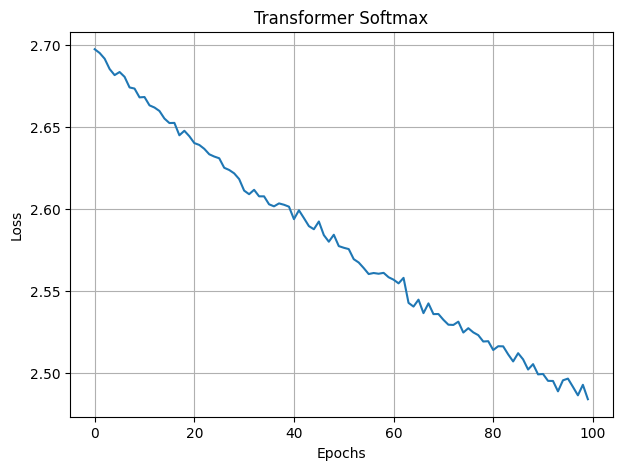

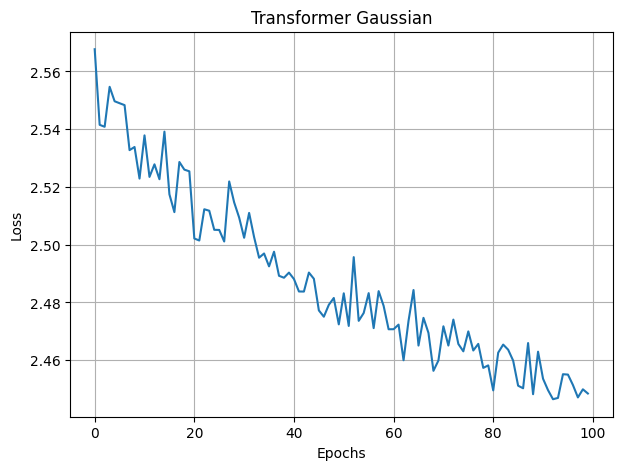

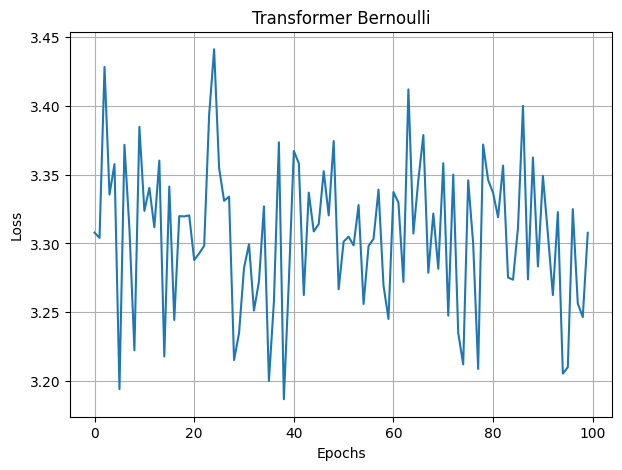

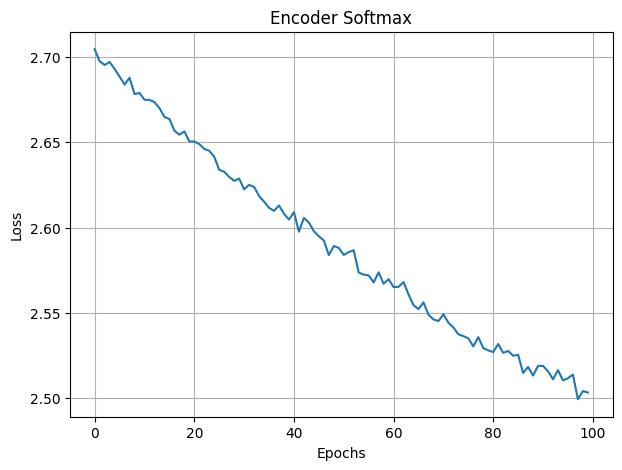

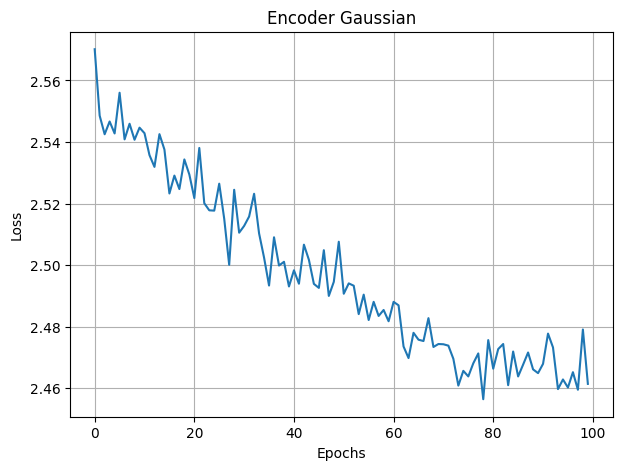

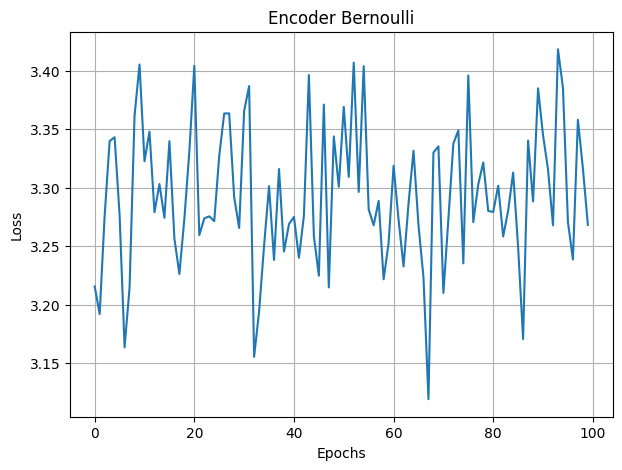

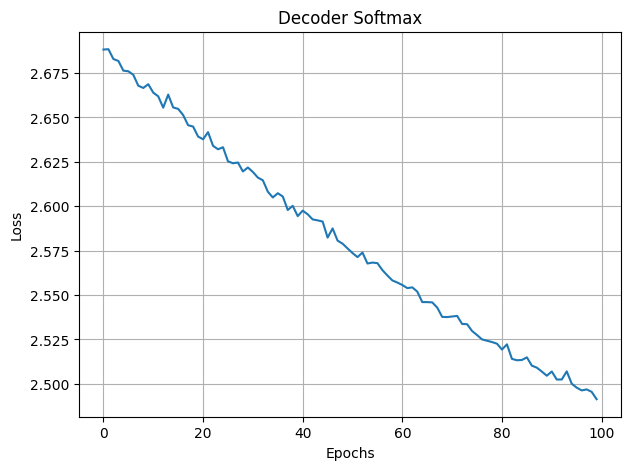

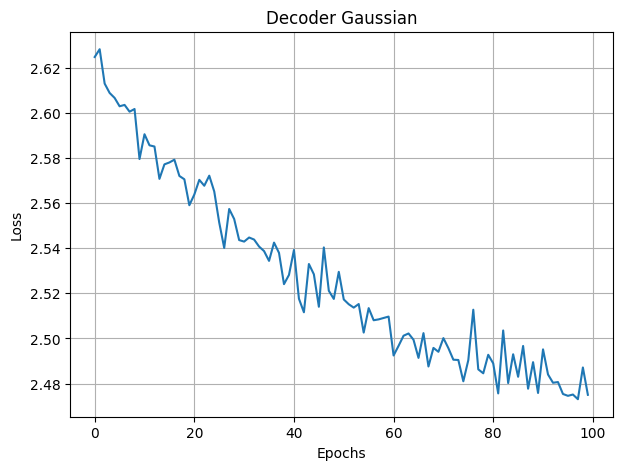

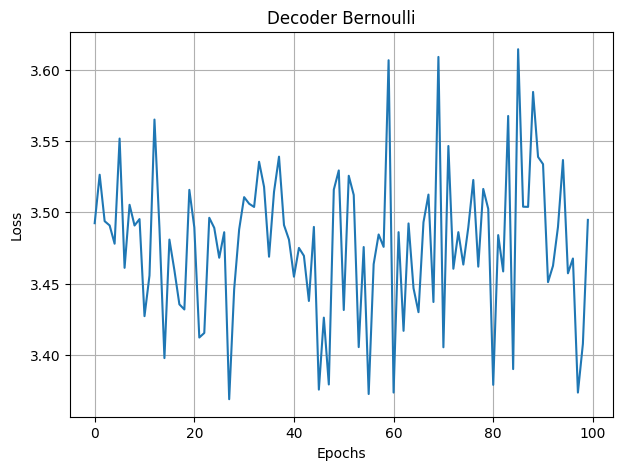

In [ ]:

# Training loop
loss_history = defaultdict(list)
print("Epoch | Model | Loss")
for epoch in range(epochs):
    for name, model in models.items():
        optimizer = optimizers[name]
        optimizer.zero_grad()
        
        output = model(dummy_data)
        loss = loss_fn(output.view(-1, vocab_size), dummy_data.view(-1))
        loss.backward()
        optimizer.step()
        
        loss_history[name].append(loss.item())
    
    if epoch % 10 == 0:
        print("-------------")
        for name, loss_list in loss_history.items():
            print(f"{epoch:5d} | {name:20s} | {loss_list[-1]:.4f}")

# Plot training loss
for name, losses in loss_history.items():
    plt.figure(figsize=(7, 5))
    plt.plot(losses)
    plt.title(name.replace("_", " "))
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()


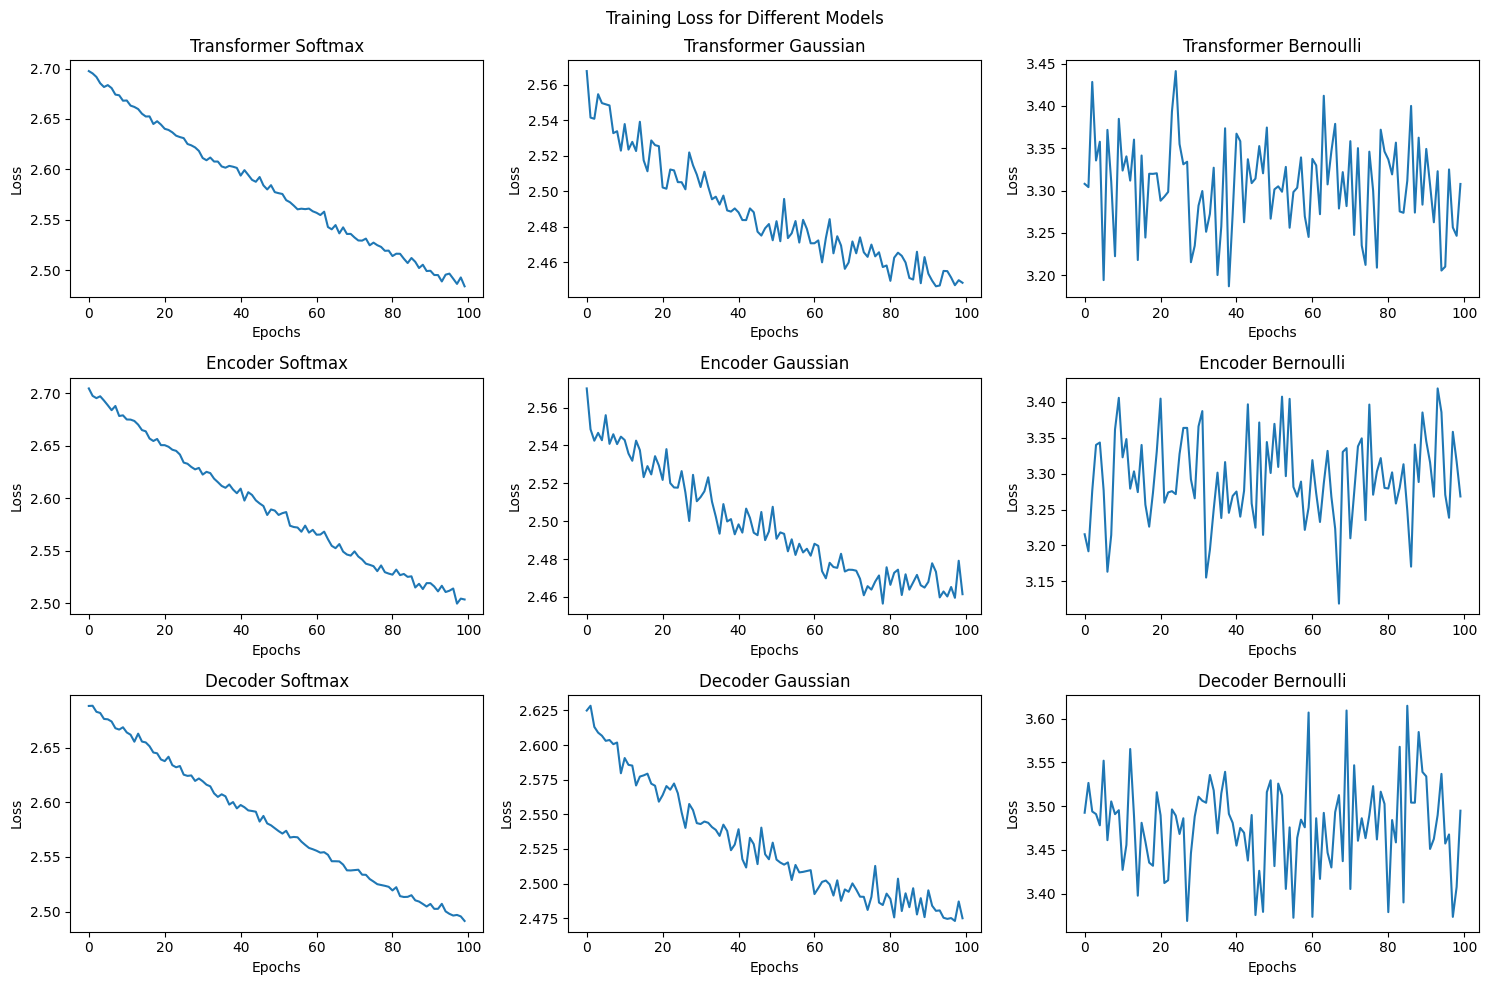

In [ ]:

# Generate combined loss plots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle("Training Loss for Different Models")

for ax, (name, losses) in zip(axes.flatten(), loss_history.items()):
    ax.plot(losses)
    ax.set_title(name.replace("_"," "))
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")

plt.tight_layout()
plt.show()

In [ ]:

# Generate predictions
with torch.no_grad():
    for name, model in models.items():
        output = model(dummy_data)
        predicted = torch.argmax(output, dim=-1)
        print(f"\n{name.replace("_"," ").capitalize()} Predictions:")
        for i, sentence in enumerate(predicted):
            print(f"  Input: {' '.join([idx2word[idx.item()] for idx in dummy_data[i]])}")
            print(f"  Predicted: {' '.join([idx2word[idx.item()] for idx in sentence])}")
        print("------------------")



Transformer softmax Predictions:
  Input: I am Learning eating eating eating eating
  Predicted: I am Learning eating eating eating eating
  Input: Discrete Mathematics is fun eating eating eating
  Predicted: Discrete Mathematics is fun eating eating eating
  Input: Making AI is also fun eating eating
  Predicted: Making AI is also fun eating eating
  Input: Probability Distributions eating eating eating eating eating
  Predicted: Probability Distributions eating eating eating eating eating
  Input: The field of AI is very interesting
  Predicted: The field of AI is very interesting
  Input: The weather is sunny eating eating eating
  Predicted: The weather is sunny eating eating eating
  Input: Numpy is cool eating eating eating eating
  Predicted: Numpy is cool eating eating eating eating
  Input: Transformers have done a lot eating eating
  Predicted: Transformers have done a lot eating eating
  Input: I am eating eating eating eating eating
  Predicted: I am eating eating eating 